
# Prediction of creditworthiness for credit card issuance

You have been hired by Pro National Bank as a data scientist, and your first assignment is to build a model that can estimate the creditworthiness of customers in order to help the dedicated team understand whether or not to accept an application for credit card issuance.

The file credit_scoring.csv contains the information of account holders who have applied for a line of credit.
- ID: identification number of the customer
- CODE_GENDER: gender of the customer
- FLAGOWNCAR: indicator of car ownership
- FLAGOWNREALTY: indicator of home ownership
- CNT_CHILDREN: number of children
- AMTINCOMETOTAL: annual income
- NAMEINCOMETYPE: type of income
- NAMEEDUCATIONTYPE: level of education
- NAMEFAMILYSTATUS: marital status
- NAMEHOUSINGTYPE: type of dwelling
- DAYS_BIRTH: number of days elapsed since birth
- DAYS_EMPLOYED: number of days elapsed since date of employment (if positive, indicates number of days since unemployed)
- FLAG_MOBIL: indicator of the presence of a cell phone number
- FLAGWORKPHONE: indicator of the presence of a work phone number
- FLAG_PHONE: indicator of the presence of a phone number
- FLAG_EMAIL: indicator of the presence of an email address
- OCCUPATION_TYPE: type of occupation
- CNTFAMMEMBERS: number of family members
- TARGET: variable that is worth 1 if the customer has high creditworthiness (constant payment of installments), 0 otherwise.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from time import time

In [ ]:
base_url = "https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_scoring.csv"
credit = pd.read_csv(base_url)
credit.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1


### Data cleaning

In [ ]:
credit.shape

(338427, 19)

In [ ]:
credit.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,TARGET
count,3.384270e+05,338427.000000,3.384270e+05,338426.000000,338426.000000,338426.0,338426.000000,338426.000000,338426.000000,338426.000000,338427.000000
mean,5.821200e+06,0.428934,1.876543e+05,-15998.249644,60238.497163,1.0,0.211379,0.293302,0.105181,2.197228,0.087824
std,4.517704e+05,0.727990,1.106747e+05,4180.240053,138499.153147,0.0,0.408287,0.455276,0.306787,0.899570,0.283039
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.439602e+06,0.000000,1.215000e+05,-19482.000000,-3116.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.878907e+06,0.000000,1.620000e+05,-15622.000000,-1485.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,6.140206e+06,1.000000,2.250000e+05,-12524.000000,-380.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,6.841875e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,1.000000


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338427 entries, 0 to 338426
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   338427 non-null  int64  
 1   CODE_GENDER          338427 non-null  object 
 2   FLAG_OWN_CAR         338427 non-null  object 
 3   FLAG_OWN_REALTY      338427 non-null  object 
 4   CNT_CHILDREN         338427 non-null  int64  
 5   AMT_INCOME_TOTAL     338427 non-null  float64
 6   NAME_INCOME_TYPE     338427 non-null  object 
 7   NAME_EDUCATION_TYPE  338427 non-null  object 
 8   NAME_FAMILY_STATUS   338426 non-null  object 
 9   NAME_HOUSING_TYPE    338426 non-null  object 
 10  DAYS_BIRTH           338426 non-null  float64
 11  DAYS_EMPLOYED        338426 non-null  float64
 12  FLAG_MOBIL           338426 non-null  float64
 13  FLAG_WORK_PHONE      338426 non-null  float64
 14  FLAG_PHONE           338426 non-null  float64
 15  FLAG_EMAIL       

In [ ]:
credit['FLAG_MOBIL'].value_counts()

,count
FLAG_MOBIL,
1.0,338426


In [ ]:
# Delete the column 'FLAG_MOBIL' since it has as its only valorer 1
credit = credit.drop('FLAG_MOBIL', axis=1)

In [ ]:
float_cols = credit.select_dtypes(include=['float64']).columns # I transform float values to integers except AMT_INCOME_TOTAL (annual income)

for col in float_cols:
    if col != 'AMT_INCOME_TOTAL':
        credit[col] = credit[col].fillna(0).astype(int)

In [ ]:
credit['OCCUPATION_TYPE'] = credit['OCCUPATION_TYPE'].fillna('Other') # I replace the null values in the [OCCUPATION_TYPE] column with Other

In [ ]:
# I see the line where NAME_FAMILY_STATUS and NAME_HOUSING_TYPE results in null
null_rows = credit[credit['NAME_FAMILY_STATUS'].isnull() | credit['NAME_HOUSING_TYPE'].isnull()]
null_rows # turns out to be the same, I will delete it as it is null in all points practically useless

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET
338426,6392180,F,N,N,0,67500.0,Working,Secondary / se,NaN,NaN,0,0,0,0,0,Other,0,0


In [ ]:
credit = credit[credit['ID'] != 6392180]

In [ ]:
credit.isna().sum() # I check the null values

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


### Visualization

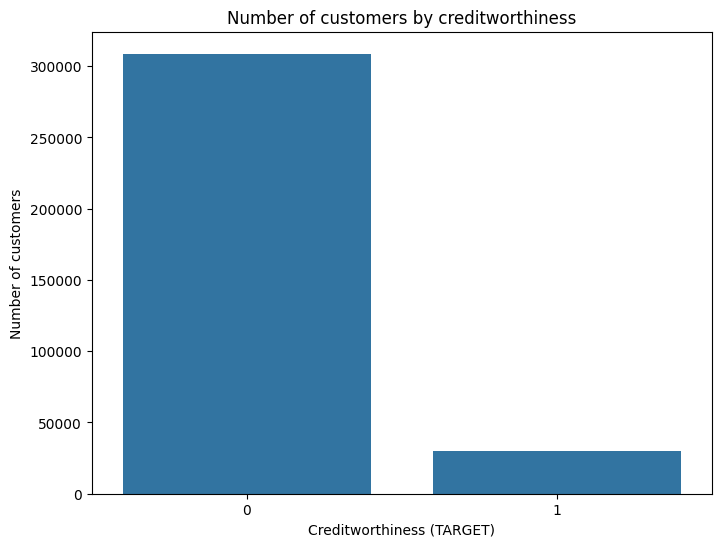

In [ ]:
# I create a bar graph to display the number of customers for each TARGET value

plt.figure(figsize=(8, 6))
sns.countplot(x='TARGET', data=credit)
plt.title('Number of customers by creditworthiness')
plt.xlabel('Creditworthiness (TARGET)')
plt.ylabel('Number of customers')
plt.show()

From the above graph it is shown that the variable that is worth 1 if the customer has high creditworthiness (constant payment of installments) is very low compared to the variable that is equal to 0

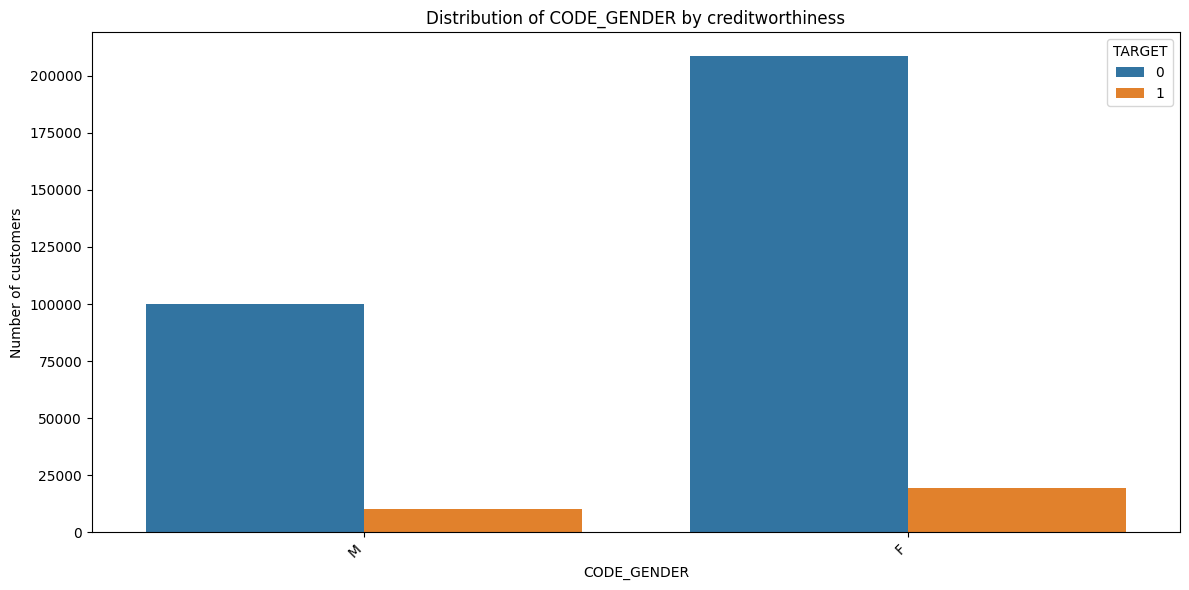

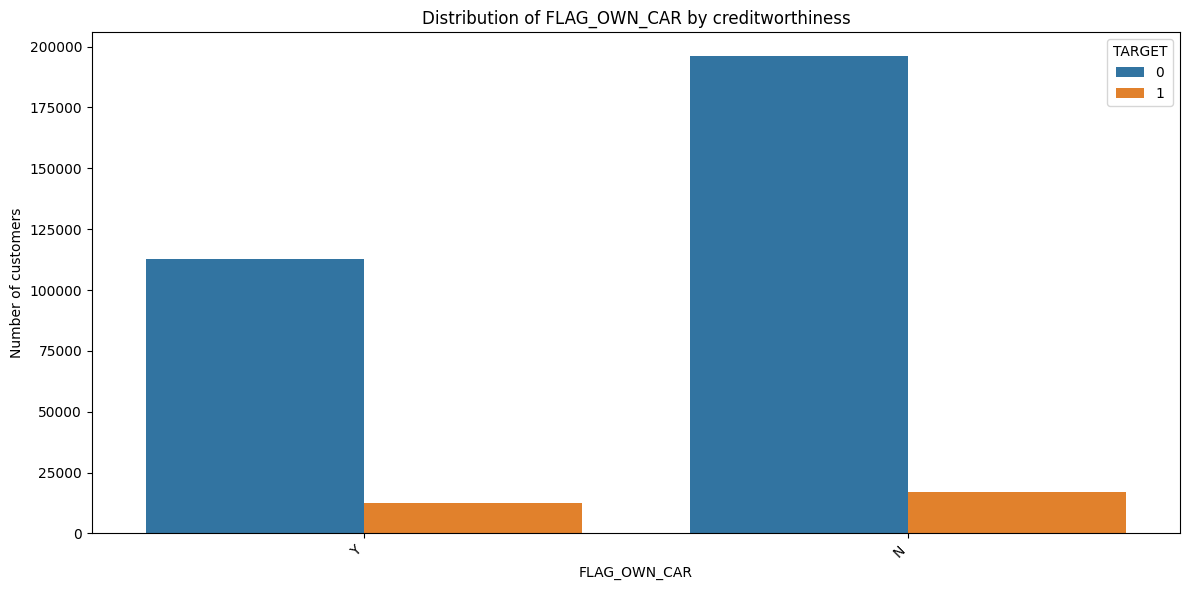

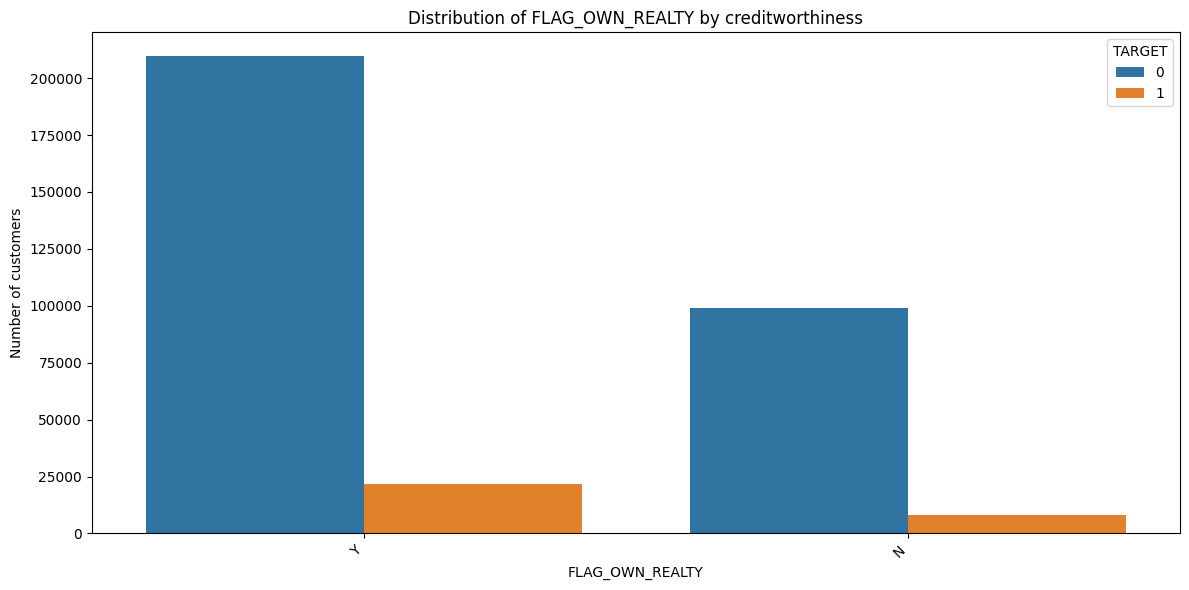

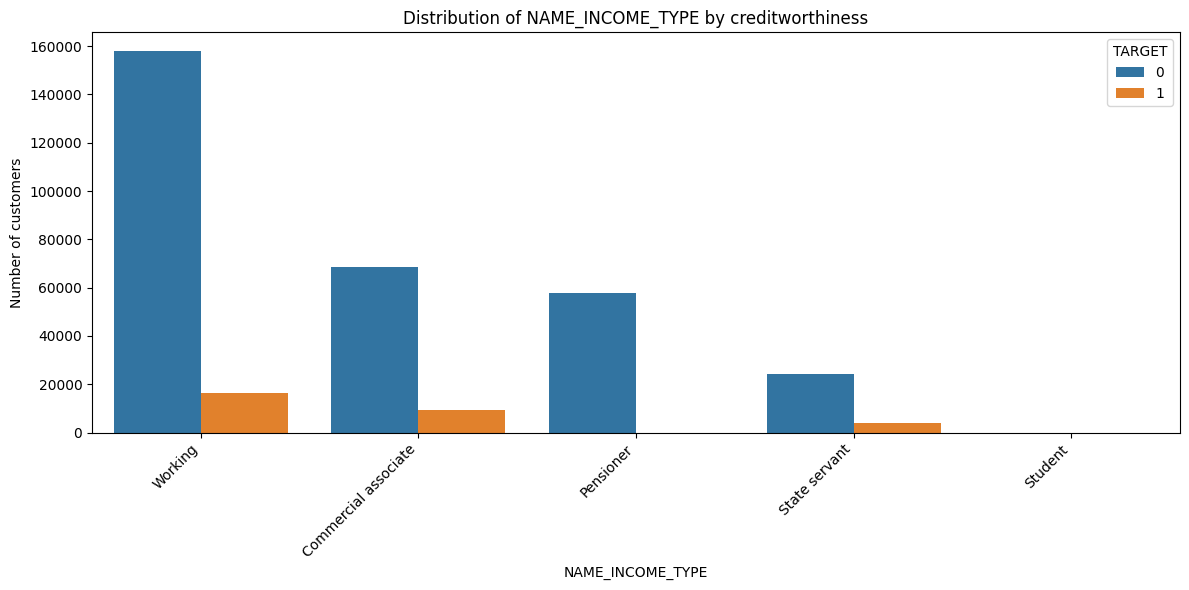

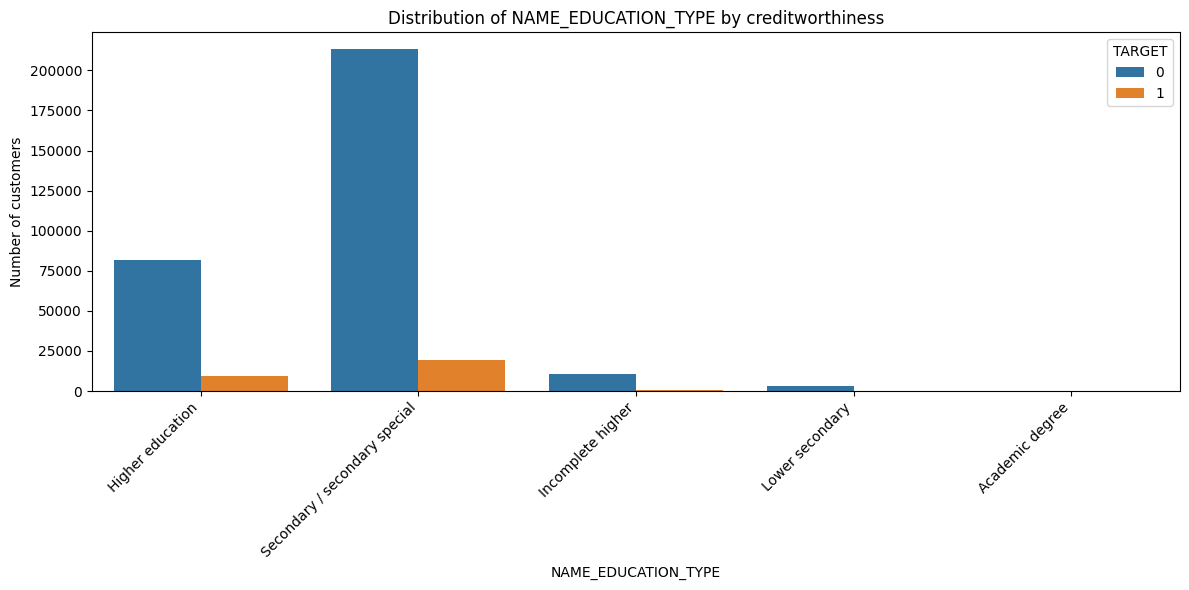

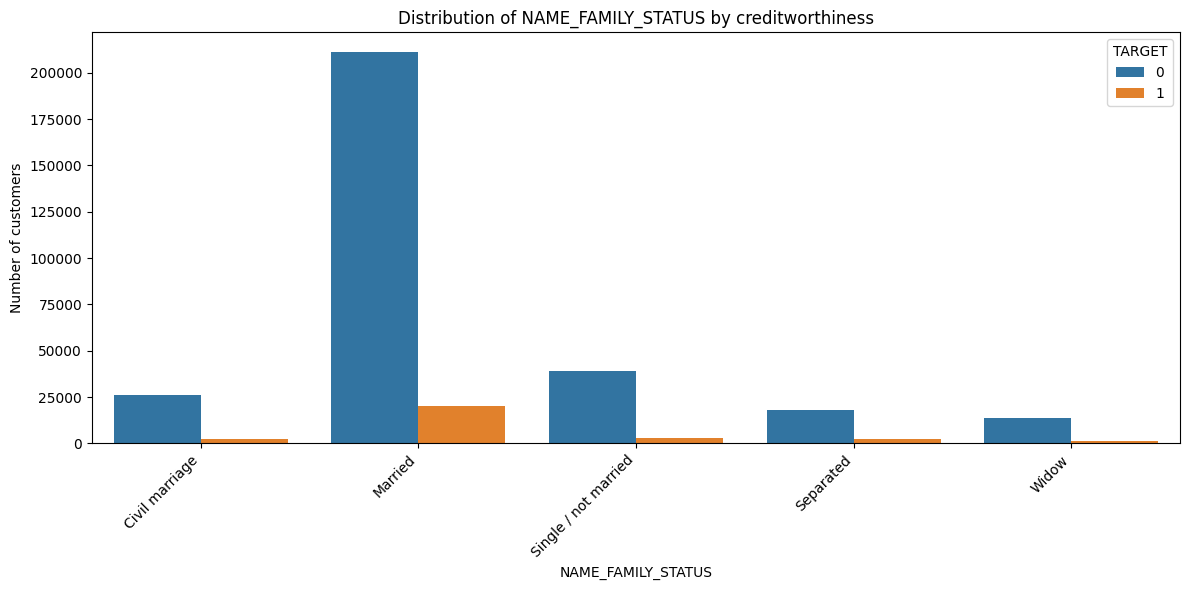

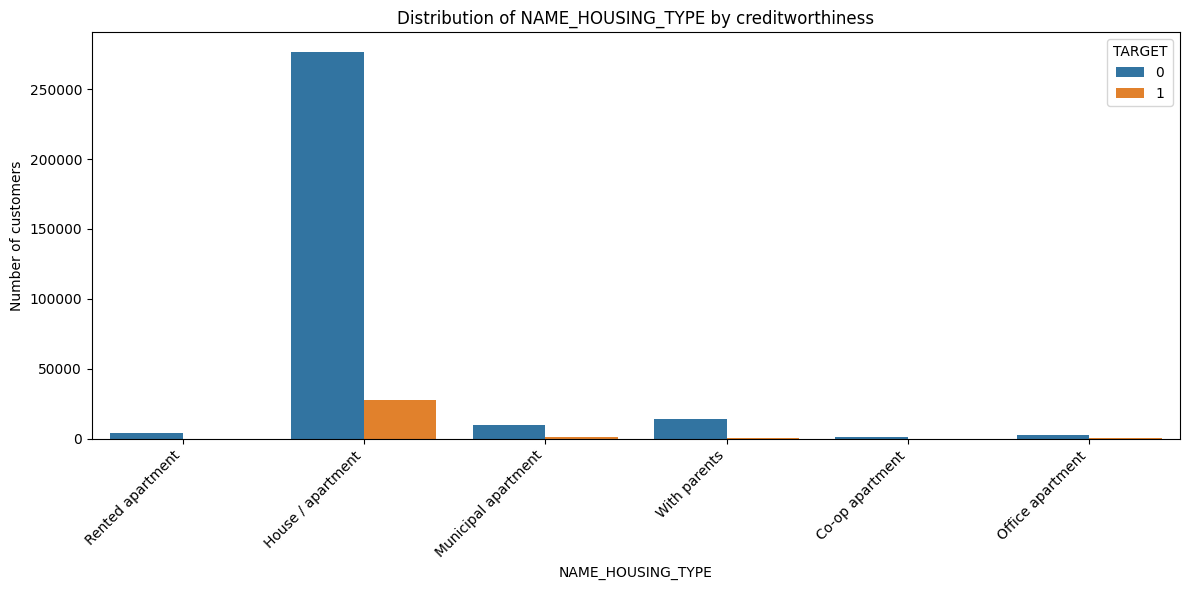

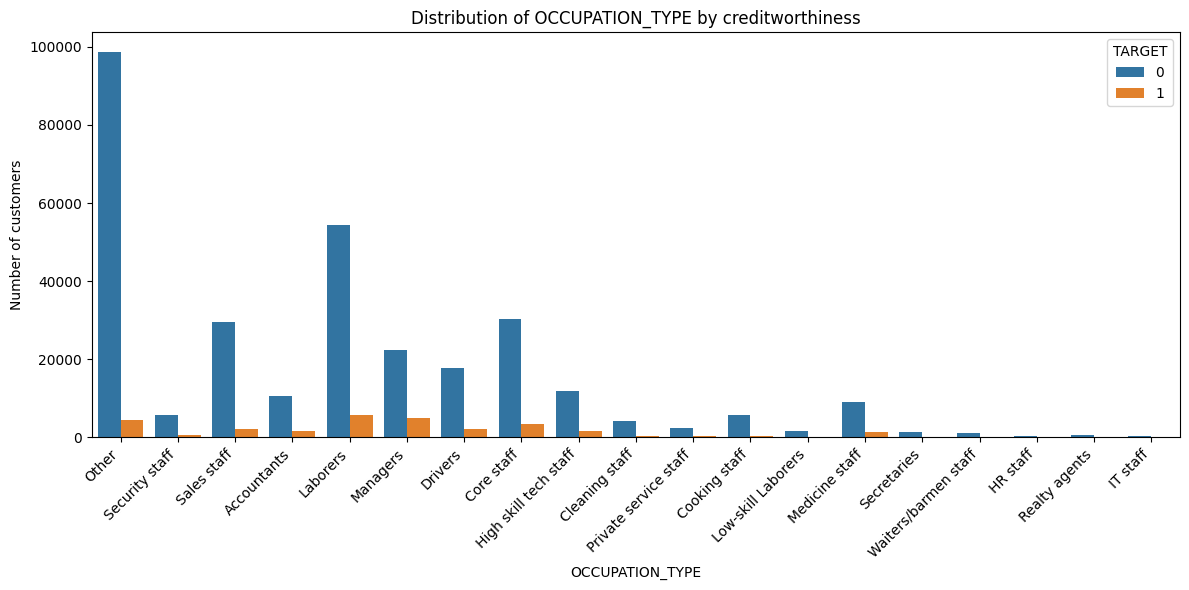

In [ ]:
# I create a series of bar graphs to display the distribution of categorical variables for each TARGET value
for col in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='TARGET', data=credit)
    plt.title(f'Distribution of {col} by creditworthiness')
    plt.xlabel(col)
    plt.ylabel('Number of customers')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Based on these graphs, we can define who has greater creditworthiness (1):
- women
- ⁠those who don't own a car
- ⁠who owns a house
- ⁠who works
- ⁠those who have the secondary/secondary special
- ⁠who is married
- ⁠who owns a house or apartment
- ⁠the laborers

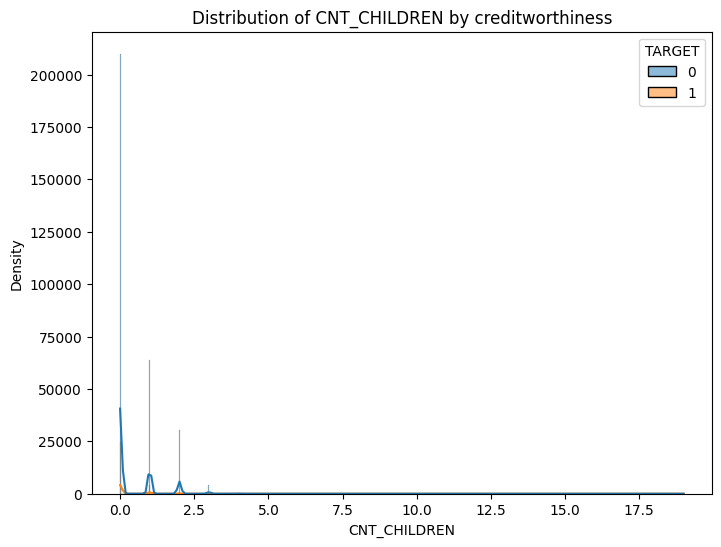

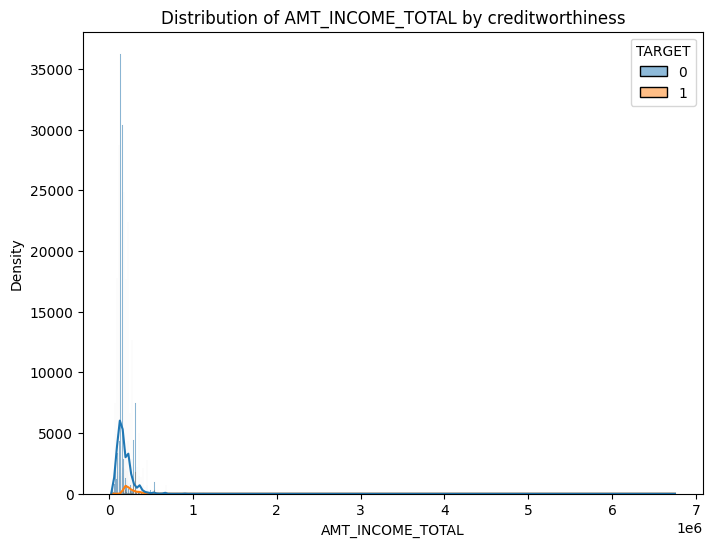

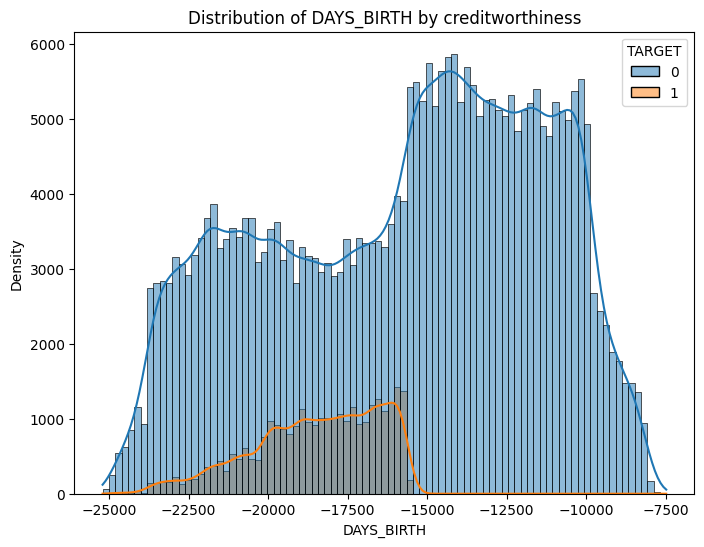

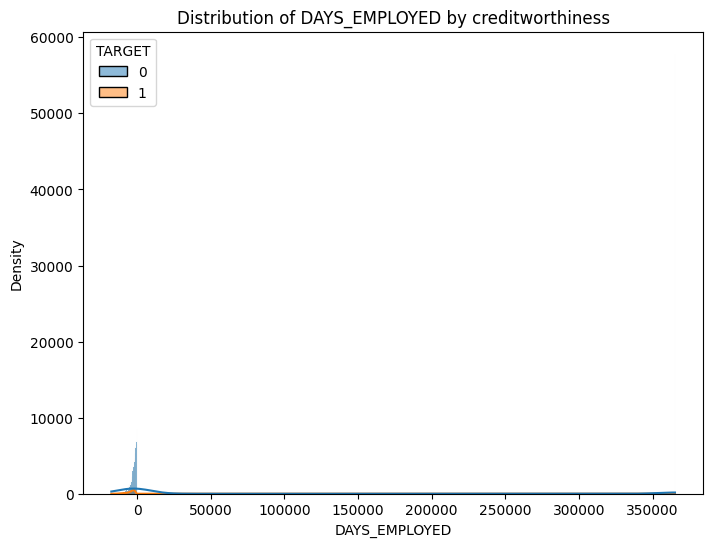

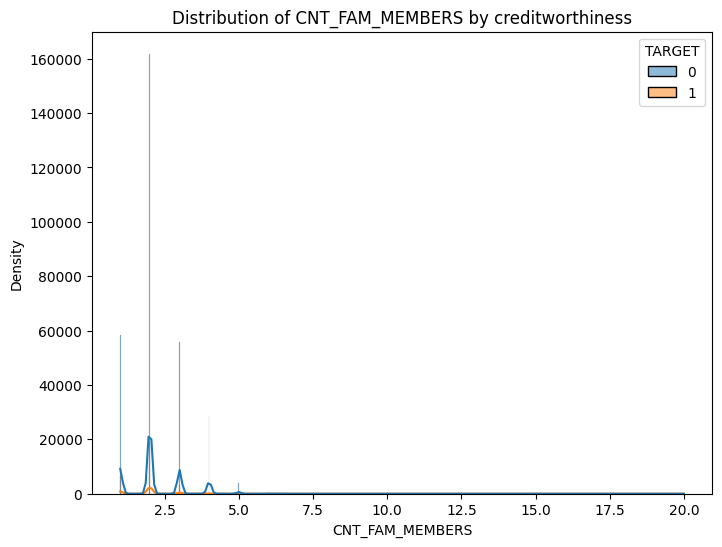

In [ ]:
# I create histograms for numerical variables
for col in ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']:
    plt.figure(figsize=(8, 6))
    sns.histplot(x=col, hue='TARGET', data=credit, kde=True) # I add kde=True to display the probability density
    plt.title(f'Distribution of {col} by creditworthiness')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

Based on these graphs, we can define who has greater creditworthiness (1):
- who has fewer children
- ⁠who has the highest income
- ⁠a family with few members
- people with higher credit scores have birth dates more concentrated in a narrower range.

### Data preprocessing

In [ ]:
# binary variables
credit['CODE_GENDER'] = credit['CODE_GENDER'].map({'M': 0, 'F': 1}) # M:0 / F:1

credit['FLAG_OWN_CAR'] = credit['FLAG_OWN_CAR'].map({'Y': 0, 'N': 1}) # Y:0 / N:1
credit['FLAG_OWN_REALTY'] = credit['FLAG_OWN_REALTY'].map({'Y': 0, 'N': 1}) # Y:0 / N:1

In [ ]:
# ordinal variable: NAME_EDUCATION_TYPE
education_mapping = {
    'Lower secondary': 1,
    'Secondary / secondary special': 2,
    'Incomplete higher': 3,
    'Higher education': 4,
    'Academic degree': 5
}

credit['NAME_EDUCATION_TYPE'] = credit['NAME_EDUCATION_TYPE'].map(education_mapping)

In [ ]:
# Convert categorical features to numerical using one-hot encoding
categorical_cols = ['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
credit = pd.get_dummies(credit, columns=categorical_cols, drop_first=True)

<Axes: >

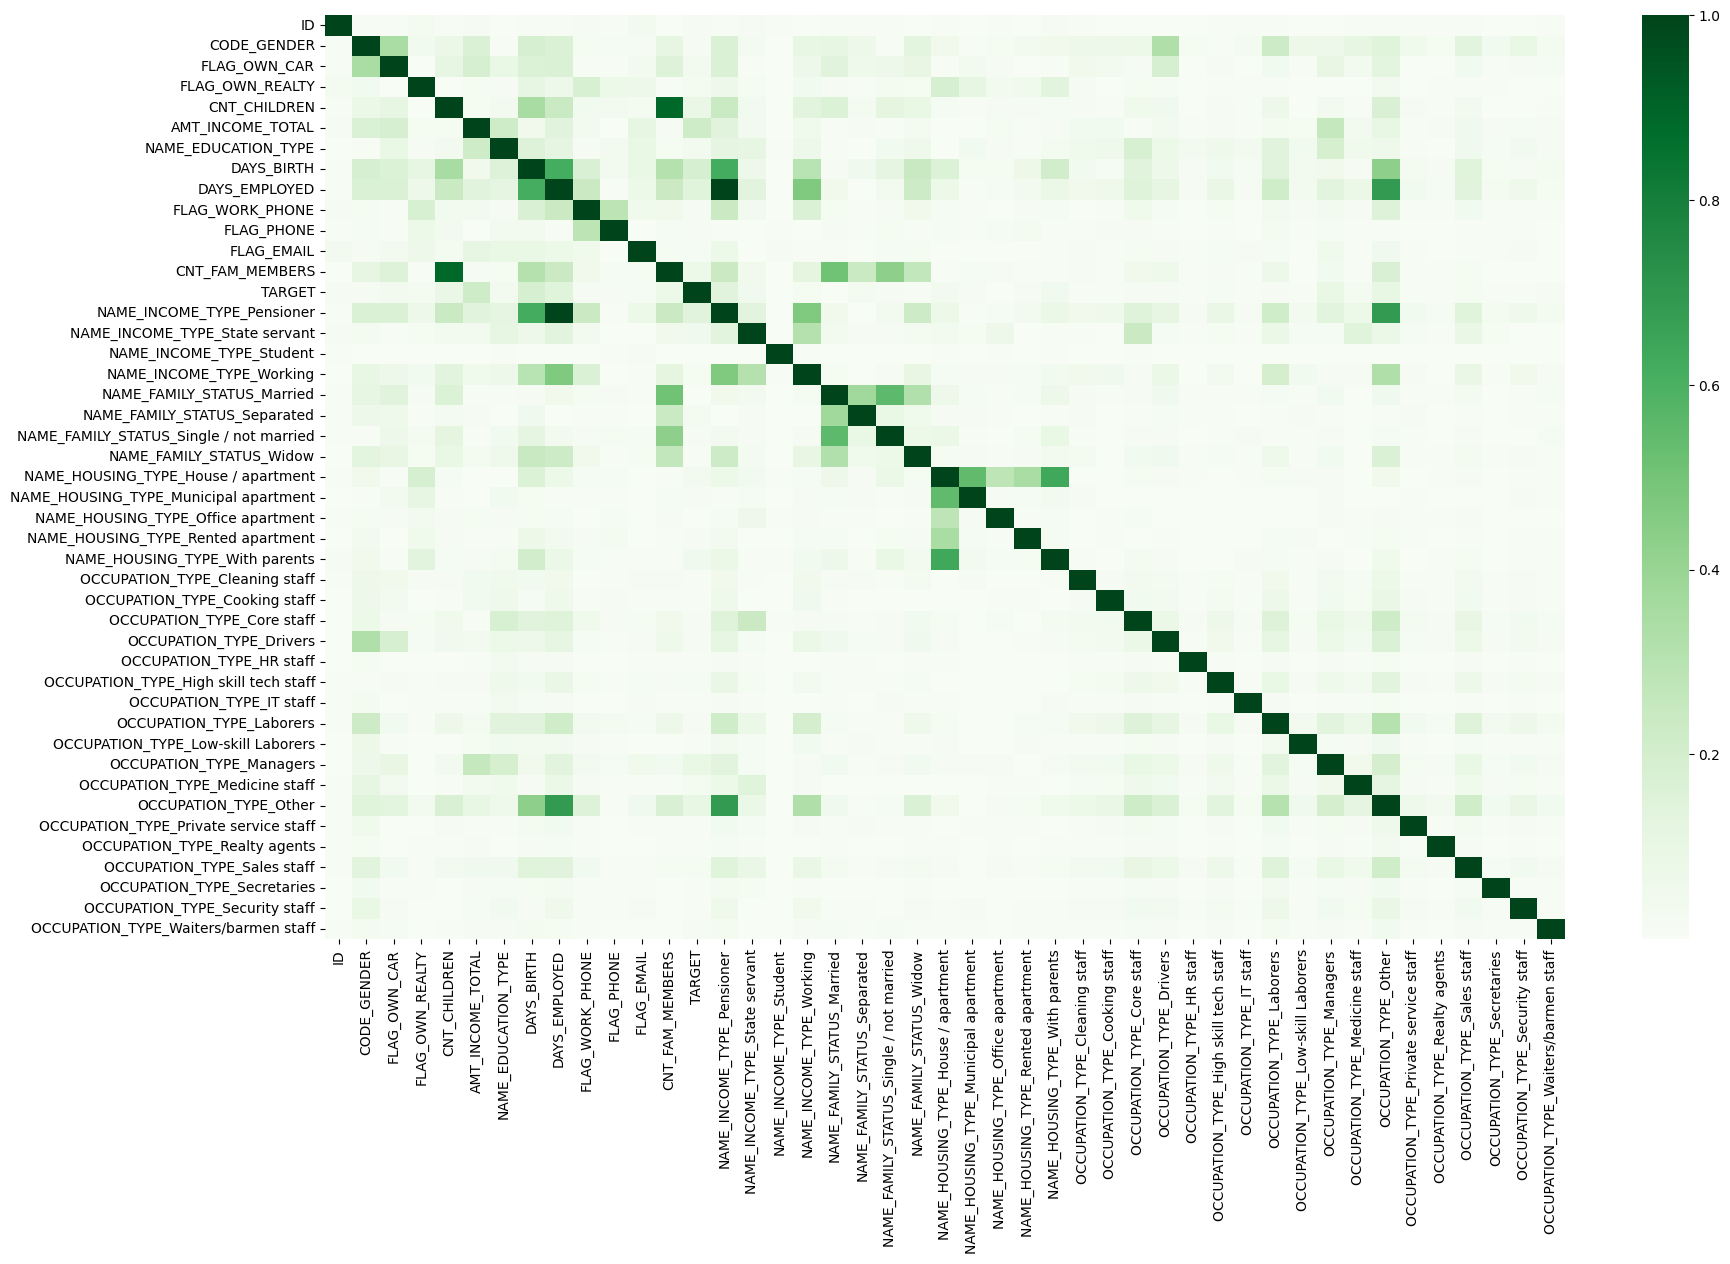

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(np.abs(credit.corr()), cmap="Greens")

In [ ]:
# I eliminate features with high multicollinearity
credit = credit.drop(["NAME_INCOME_TYPE_Pensioner", "OCCUPATION_TYPE_Other", "CNT_FAM_MEMBERS"],
             axis=1, errors='ignore')

<Axes: >

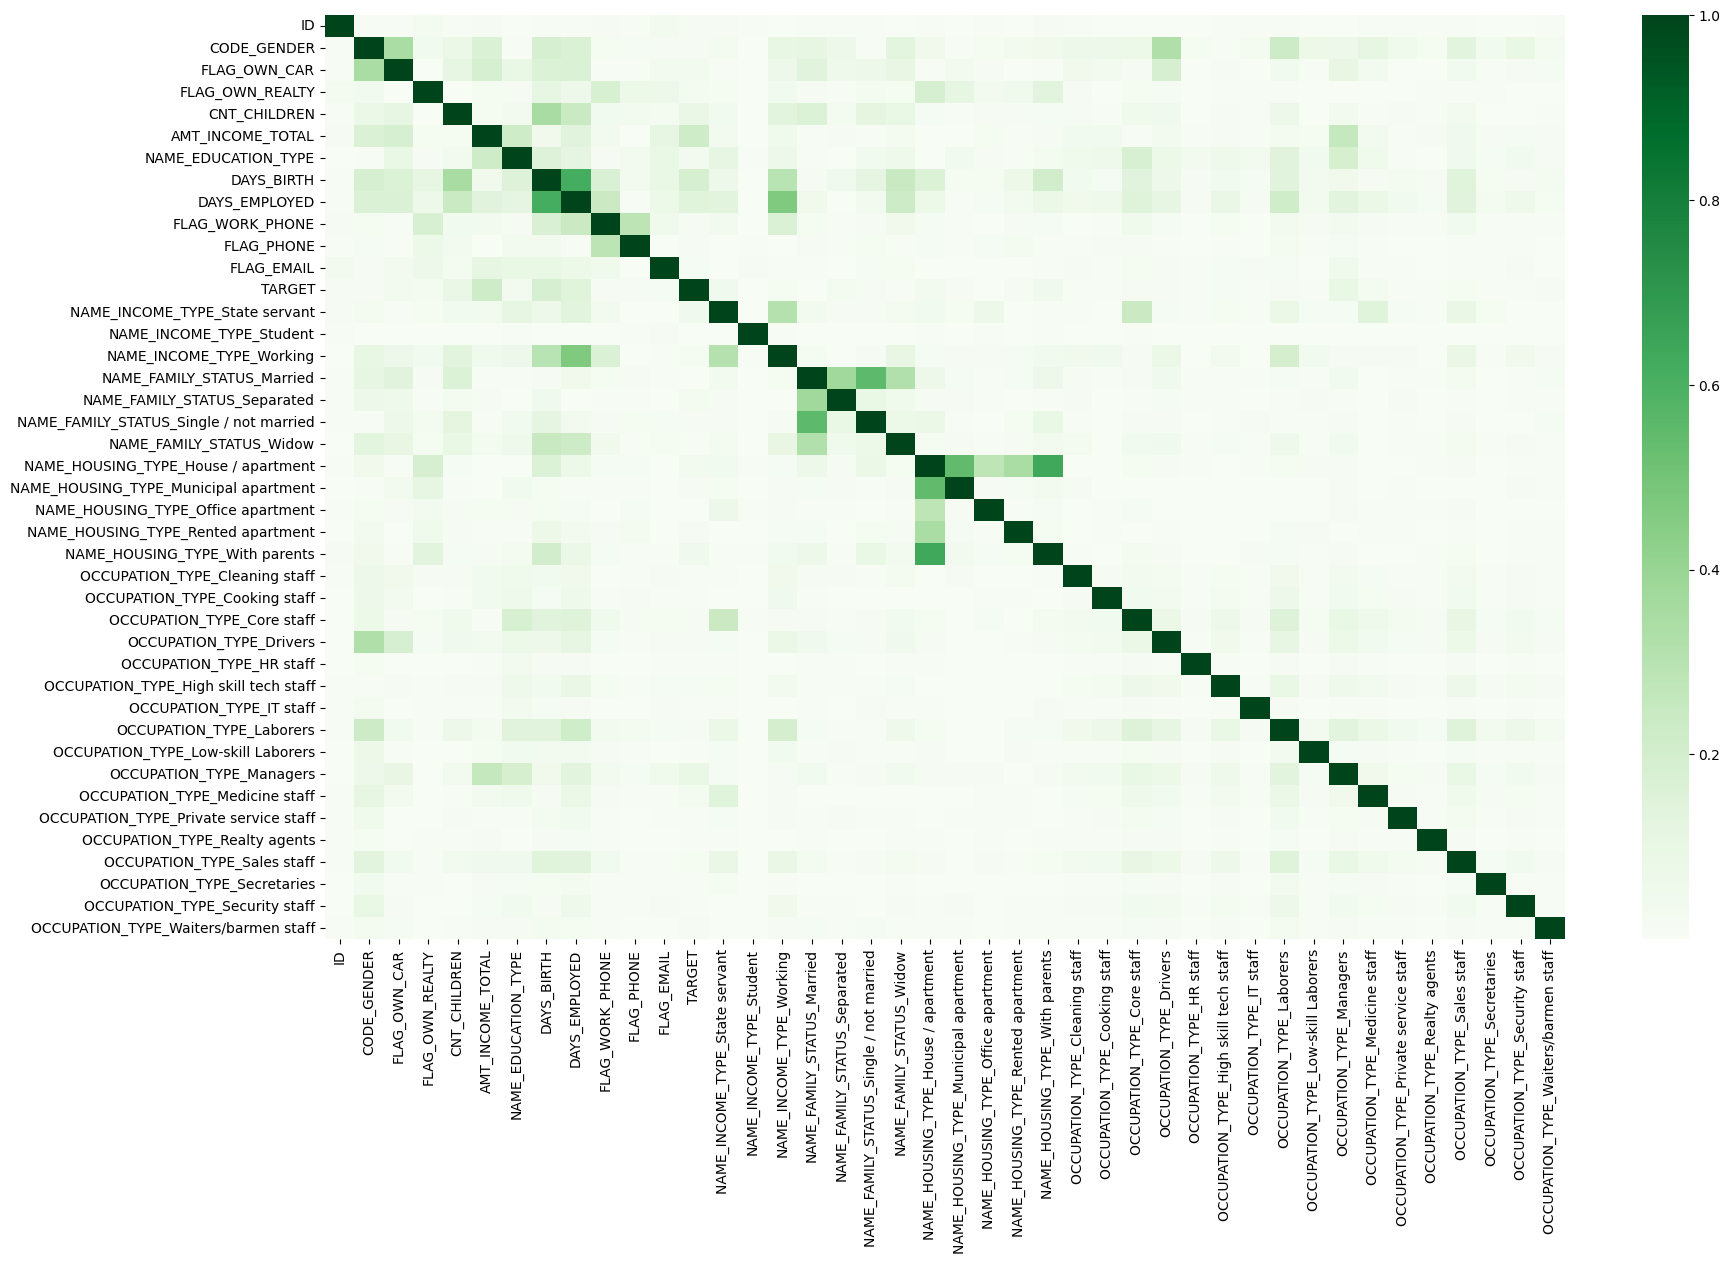

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(np.abs(credit.corr()), cmap="Greens")

### Train test and modelling

In [ ]:
X = credit.drop(['TARGET', 'ID'], axis=1)
y = credit['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def classification_model(model_name, model, train_data, test_data):
  X_train, y_train = train_data
  X_test, y_test = test_data

  print(model_name)
  print("TRAIN SET -------------------------------------------")
  print(classification_report(y_train, model.predict(X_train)))

  print("TEST SET --------------------------------------------")
  print(classification_report(y_test, model.predict(X_test)))

 KNN, SVM, and Neural Networks are not used in this specific scenario due to the dataset characteristics and the problem's requirements.

1. Dataset Size: The dataset is not massive. KNN and Neural Networks can be computationally expensive, especially with high dimensionality. Simpler models offer comparable performance with less computational overhead.

2. Interpretability:  Logistic Regression and Decision Trees offer greater interpretability, crucial for financial applications where transparency is important. KNN, SVM, and neural networks are harder to explain.

3. Potential Overfitting: Complex models are susceptible to overfitting with a relatively smaller dataset and many features. Simpler models generalize better.

In [ ]:
RANDOM_SEED = 0

models = {
    'Logistic Regression': LogisticRegression(random_state=RANDOM_SEED),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_SEED),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_SEED)
}

In [ ]:
for model_name, model in models.items():

  model.fit(X_train, y_train)

  tick = time()

  classification_model(model_name, model, (X_train, y_train), (X_test, y_test))
  print(f"{model_name}: addestramento completato in {time()-tick:.2f} secondi\n\n")

Logistic Regression
TRAIN SET -------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.95    247078
           1       0.52      0.20      0.28     23662

    accuracy                           0.91    270740
   macro avg       0.72      0.59      0.62    270740
weighted avg       0.89      0.91      0.90    270740

TEST SET --------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     61626
           1       0.52      0.19      0.28      6060

    accuracy                           0.91     67686
   macro avg       0.72      0.59      0.62     67686
weighted avg       0.89      0.91      0.89     67686

Logistic Regression: addestramento completato in 0.27 secondi


Decision Tree
TRAIN SET -------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.

1. Logistic Regression:
- Training time: 0.28 seconds;
- Accuracy: 91% (both train and test);
- Poor performance on the positive class (1);

2. Decision Tree:
- Training time: 0.25 seconds (fastest);
- Accuracy: 97% (train) / 95% (test);
- Best performance on the positive class;

3. Random Forest:
- Training time: 4.95 seconds;
- Accuracy: 97% (train) / 95% (test);
- Best performance on the positive class;


Random Forest is the best model for several reasons:
- Higher Accuracy (95%)
- Better recall on the positive class (0.84)
- Higher F1-score on the positive class (0.77)

More interpretable than Neural Network, good balance between precision and recall

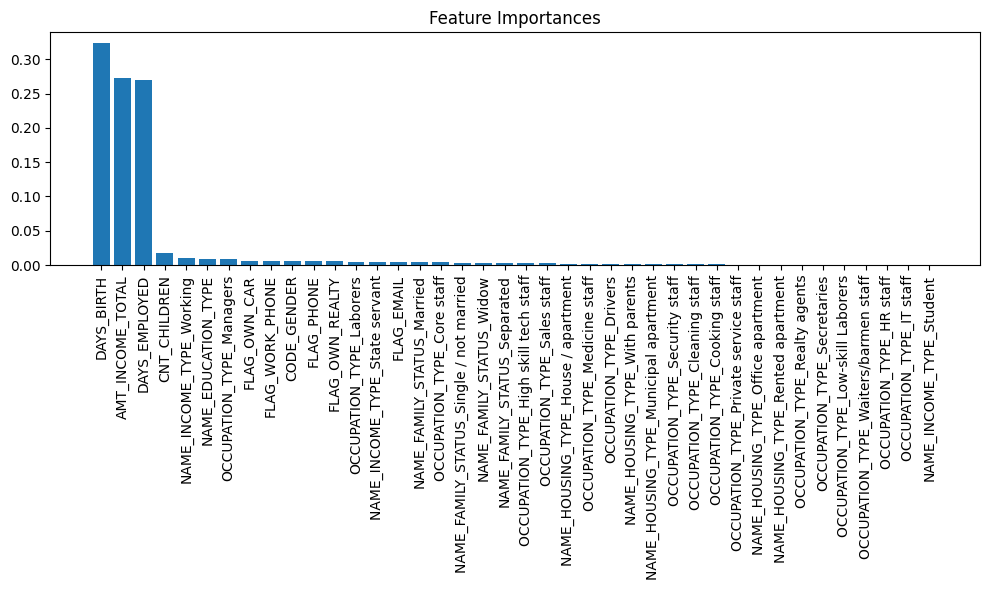

In [ ]:
# I show interpretability for random forest

rfc = RandomForestClassifier(random_state=RANDOM_SEED) # Initialize and train a RandomForestClassifier

rfc.fit(X_train, y_train)

importances = rfc.feature_importances_
feature_names = X.columns.to_numpy()

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


DAYS_BIRTH seems to be the most relevant variable for assessing a person's creditworthiness.
Other variables also significantly influence the analysis, including:  
- AMT_INCOME_TOTAL  
- DAYS_EMPLOYEE


Both appear consistent with the context.